### Spam Mail Detection

In [13]:
import numpy as np
import pandas as pd
import nltk

In [14]:
dl = pd.read_excel(r'D:\capstone\implementation\emails.xlsx')
dl

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5721,Subject: re : research and development charges...,0
5722,"Subject: re : receipts from visit jim , than...",0
5723,Subject: re : enron case study update wow ! a...,0
5724,"Subject: re : interest david , please , call...",0


In [15]:
dl=dl.iloc[:,:2]
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [16]:
dl['spam'][1381]

0

In [17]:
dl.drop(1381,axis=0,inplace=True)

In [18]:
dl.drop(2652,axis=0,inplace=True)

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

## EDA

In [20]:
dl['spam'].value_counts()

spam
0    4357
1    1367
Name: count, dtype: int64

In [21]:
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [22]:
import string
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
dl['text']= dl['text'].apply(lambda x: remove_punctuations(x))
dl.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


In [23]:
dl['text'] = dl['text'].str.replace('Subject', '')
dl.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,do not have money get software cds from here...,1


In [24]:
dl.dropna(inplace=True)

In [25]:
dl.drop_duplicates(inplace=True)

In [26]:
# Check if any duplicate values and remove them
dl.duplicated().sum()

0

In [27]:
dl.shape

(5690, 2)

In [28]:
Y = dl['spam']
X = dl

In [29]:
X.drop('spam',axis=1,inplace=True)

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_re,Y_re = rus.fit_resample(X,Y)

In [31]:
X_re

,text
2444,re it was nice meeting you at the informs me...
2225,analysis of dabhol energy cost jeff i am f...
2594,preface for book vince hope you are well...
4797,wharton program for business journalists hi ...
3631,oracle nt client software upgrade manual upg...
...,...
1363,are you ready to get it hello viagra is t...
1364,would you like a 250 gas card don t let t...
1365,immediate reply needed dear sir i am dr ja...
1366,wanna see me get fisted fist bang will sho...


In [32]:
Y_re

2444    0
2225    0
2594    0
4797    0
3631    0
       ..
1363    1
1364    1
1365    1
1366    1
1367    1
Name: spam, Length: 2734, dtype: int64

In [33]:
m = pd.DataFrame(Y_re)
m

,spam
2444,0
2225,0
2594,0
4797,0
3631,0
...,...
1363,1
1364,1
1365,1
1366,1


In [34]:
X_re.insert(loc=1,column='gt',value=Y_re)

In [35]:
X_re

,text,gt
2444,re it was nice meeting you at the informs me...,0
2225,analysis of dabhol energy cost jeff i am f...,0
2594,preface for book vince hope you are well...,0
4797,wharton program for business journalists hi ...,0
3631,oracle nt client software upgrade manual upg...,0
...,...,...
1363,are you ready to get it hello viagra is t...,1
1364,would you like a 250 gas card don t let t...,1
1365,immediate reply needed dear sir i am dr ja...,1
1366,wanna see me get fisted fist bang will sho...,1


In [36]:
X_re['gt'].value_counts()

gt
0    1367
1    1367
Name: count, dtype: int64

In [37]:
X_re.rename(columns={'gt':'target'},inplace=True)

In [38]:
data = X_re

In [39]:
data.head()

,text,target
2444,re it was nice meeting you at the informs me...,0
2225,analysis of dabhol energy cost jeff i am f...,0
2594,preface for book vince hope you are well...,0
4797,wharton program for business journalists hi ...,0
3631,oracle nt client software upgrade manual upg...,0


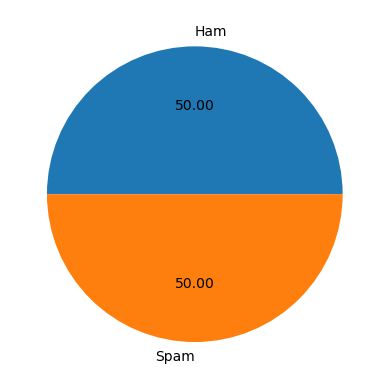

In [40]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
data['num_characters'] = data['text'].apply(len) 

In [43]:
data.head()

,text,target,num_characters
2444,re it was nice meeting you at the informs me...,0,3004
2225,analysis of dabhol energy cost jeff i am f...,0,1196
2594,preface for book vince hope you are well...,0,7930
4797,wharton program for business journalists hi ...,0,3720
3631,oracle nt client software upgrade manual upg...,0,1163


In [44]:
#num of words
data['text'].apply(lambda x:nltk.word_tokenize(x))

2444    [re, it, was, nice, meeting, you, at, the, inf...
2225    [analysis, of, dabhol, energy, cost, jeff, i, ...
2594    [preface, for, book, vince, hope, you, are, we...
4797    [wharton, program, for, business, journalists,...
3631    [oracle, nt, client, software, upgrade, manual...
                              ...                        
1363    [are, you, ready, to, get, it, hello, viagra, ...
1364    [would, you, like, a, 250, gas, card, don, t, ...
1365    [immediate, reply, needed, dear, sir, i, am, d...
1366    [wan, na, see, me, get, fisted, fist, bang, wi...
1367    [hot, stock, info, drgv, announces, another, p...
Name: text, Length: 2734, dtype: object

In [45]:
data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

2444     476
2225     190
2594    1235
4797     608
3631     186
        ... 
1363      59
1364      34
1365     525
1366     128
1367    1408
Name: text, Length: 2734, dtype: int64

In [46]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
data.head()

,text,target,num_characters,num_words
2444,re it was nice meeting you at the informs me...,0,3004,476
2225,analysis of dabhol energy cost jeff i am f...,0,1196,190
2594,preface for book vince hope you are well...,0,7930,1235
4797,wharton program for business journalists hi ...,0,3720,608
3631,oracle nt client software upgrade manual upg...,0,1163,186


In [48]:
#num of sentences
data['text'].apply(lambda x:nltk.sent_tokenize(x))

2444    [ re  it was nice meeting you at the informs m...
2225    [ analysis of dabhol energy cost  jeff   i am ...
2594    [ preface for book  vince     hope you are wel...
4797    [ wharton program for business journalists  hi...
3631    [ oracle nt client software upgrade  manual up...
                              ...                        
1363    [ are you ready to get it   hello   viagra is ...
1364    [ would you like a  250 gas card   don  t let ...
1365    [ immediate reply needed  dear sir   i am dr j...
1366    [ wanna see me get fisted   fist  bang will sh...
1367    [ hot stock info  drgv announces another press...
Name: text, Length: 2734, dtype: object

In [49]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
data.head()

,text,target,num_characters,num_words,num_sentences
2444,re it was nice meeting you at the informs me...,0,3004,476,1
2225,analysis of dabhol energy cost jeff i am f...,0,1196,190,1
2594,preface for book vince hope you are well...,0,7930,1235,1
4797,wharton program for business journalists hi ...,0,3720,608,1
3631,oracle nt client software upgrade manual upg...,0,1163,186,1


In [51]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2734.000000,2734.000000,2734.0
mean,1416.925384,234.395757,1.0
std,1967.658581,324.580650,0.0
min,8.000000,1.000000,1.0
25%,442.250000,74.000000,1.0
50%,803.500000,137.000000,1.0
75%,1632.750000,271.000000,1.0
max,27298.000000,5003.000000,1.0


In [52]:
data['target'] = data['target'].astype(int)

In [53]:
#description only for spam mails
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.0
mean,1250.218727,206.155816,1.0
std,2185.784473,362.552027,0.0
min,8.000000,1.000000,1.0
25%,375.500000,62.000000,1.0
50%,625.000000,99.000000,1.0
75%,1196.000000,191.000000,1.0
max,27298.000000,5003.000000,1.0


In [54]:
#description only for ham mails
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.0
mean,1583.632041,262.635699,1.0
std,1706.727346,278.822872,0.0
min,25.000000,3.000000,1.0
25%,567.000000,96.500000,1.0
50%,1089.000000,186.000000,1.0
75%,2001.000000,338.000000,1.0
max,26603.000000,4271.000000,1.0


In [55]:
import seaborn as sns

c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

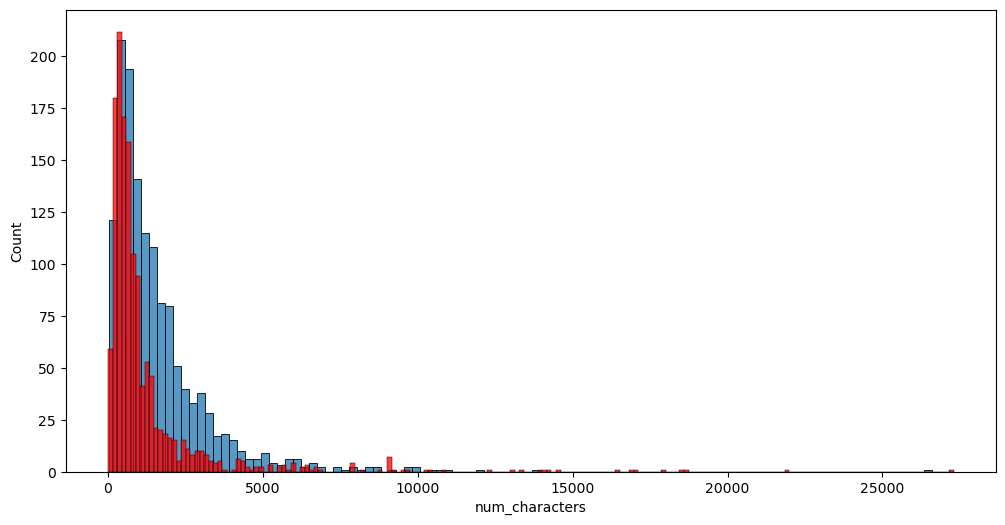

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters']) #for ham
sns.histplot(data[data['target'] == 1]['num_characters'],color='red') #for spam

c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

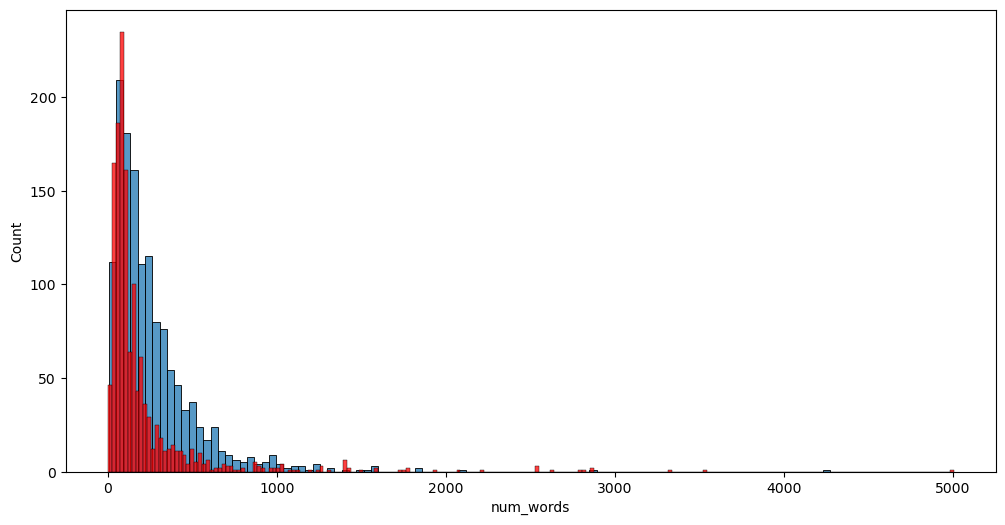

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words']) #for ham
sns.histplot(data[data['target'] == 1]['num_words'],color='red') #for spam

c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


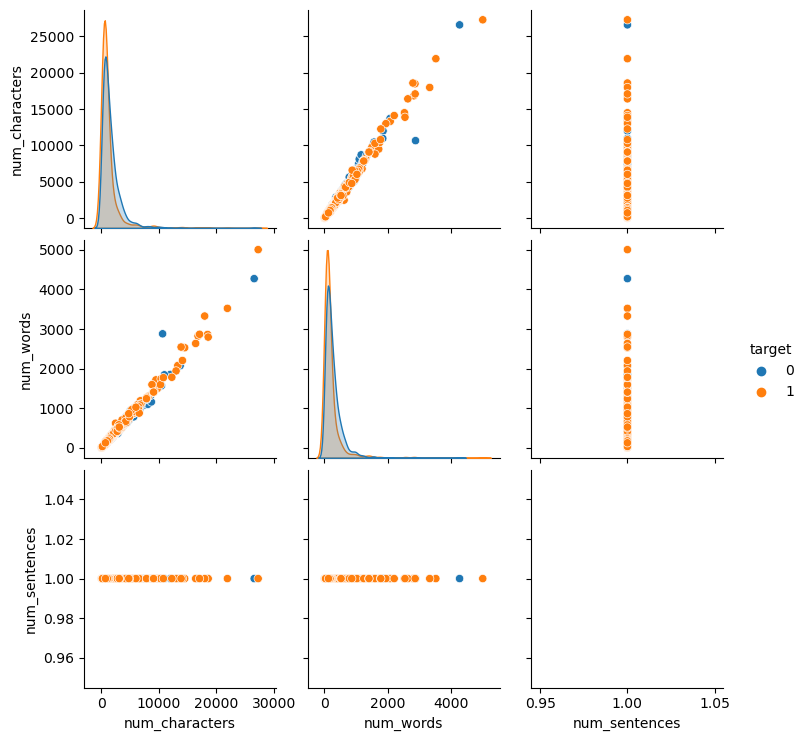

In [58]:
sns.pairplot(data,hue='target')

In [60]:
# data.corr()

<ipython-input-51-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

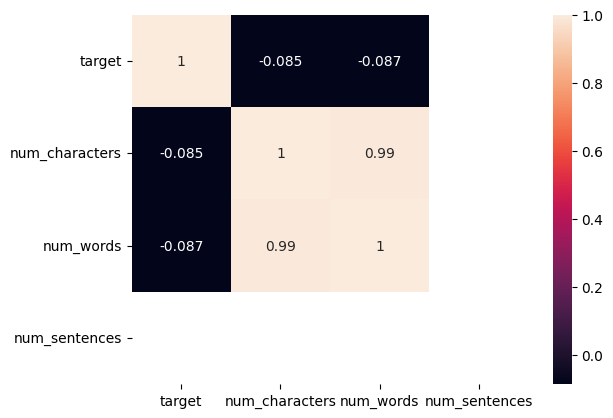

In [ ]:
sns.heatmap(data.corr(),annot=True)

##Data Preprocessing

In [61]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
import string
from nltk.stem.porter import PorterStemmer

In [63]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum(): #this is to remove special chars
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i)) #applying stemming

  return " ".join(y)

In [67]:
data['text'].apply(transform_text)

2444    nice meet inform meet enjoy talk slc confer th...
2225    analysi dabhol energi cost jeff forward analys...
2594    prefac book vinc hope well spoke ago write pre...
4797    wharton program busi journalist hi greg inform...
3631    oracl nt client softwar upgrad manual upgrad s...
                              ...                        
1363    readi get hello viagra 1 med struggl men erect...
1364    would like 250 ga card let current high price ...
1365    immedi repli need dear sir dr jame alabi chair...
1366    wan na see get fist fist bang show everyth alw...
1367    hot stock info drgv announc anoth press releas...
Name: text, Length: 2734, dtype: object

In [68]:
data['transformed_text'] = data['text'].apply(transform_text)

In [69]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
2444,re it was nice meeting you at the informs me...,0,3004,476,1,nice meet inform meet enjoy talk slc confer th...
2225,analysis of dabhol energy cost jeff i am f...,0,1196,190,1,analysi dabhol energi cost jeff forward analys...
2594,preface for book vince hope you are well...,0,7930,1235,1,prefac book vinc hope well spoke ago write pre...
4797,wharton program for business journalists hi ...,0,3720,608,1,wharton program busi journalist hi greg inform...
3631,oracle nt client software upgrade manual upg...,0,1163,186,1,oracl nt client softwar upgrad manual upgrad s...


In [75]:
import sys
print(sys.executable)

c:\Users\klins\anaconda3\python.exe


In [78]:
# wordcloud of spam mails
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [79]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

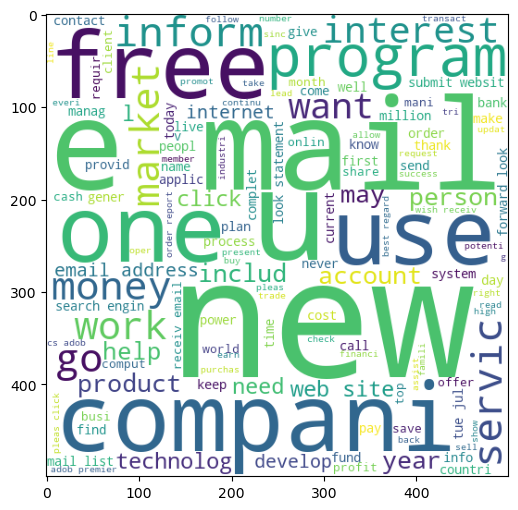

In [80]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [81]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

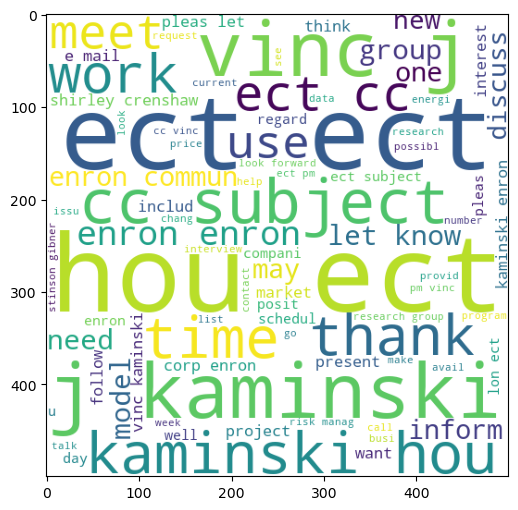

In [82]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [83]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
2444,re it was nice meeting you at the informs me...,0,3004,476,1,nice meet inform meet enjoy talk slc confer th...
2225,analysis of dabhol energy cost jeff i am f...,0,1196,190,1,analysi dabhol energi cost jeff forward analys...
2594,preface for book vince hope you are well...,0,7930,1235,1,prefac book vinc hope well spoke ago write pre...
4797,wharton program for business journalists hi ...,0,3720,608,1,wharton program busi journalist hi greg inform...
3631,oracle nt client software upgrade manual upg...,0,1163,186,1,oracl nt client softwar upgrad manual upgrad s...


In [84]:
data[data['target'] == 1]['transformed_text'].tolist()

['natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morrist

In [85]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [86]:
len(spam_corpus)

173094

In [87]:
from collections import Counter
Counter(spam_corpus).most_common(30) #gives most commonly occuring 30 words

[('compani', 1065),
 ('com', 999),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 698),
 ('get', 693),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('3', 604),
 ('free', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507)]

##Model Building

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [89]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [90]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
X.shape

(2734, 22104)

In [92]:
y = data['target'].values

In [93]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9488117001828154
[[257   5]
 [ 23 262]]
0.9812734082397003


In [98]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9853747714808044
[[255   7]
 [  1 284]]
0.9759450171821306


In [99]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9707495429616088
[[246  16]
 [  0 285]]
0.946843853820598


In [100]:
# since we've used countvectorizer(bag of words) let's now try with tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()#max_features=3000

In [101]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [103]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9488117001828154
[[252  10]
 [ 18 267]]
0.9638989169675091


In [104]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9853747714808044
[[259   3]
 [  5 280]]
0.9893992932862191


In [105]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9707495429616088
[[246  16]
 [  0 285]]
0.946843853820598


In [109]:
# we'll now consider many other models and compare them with our mnb model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB':xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [114]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9908592321755028
Precision -  0.9827586206896551
For  KN
Accuracy -  0.9744058500914077
Precision -  0.985663082437276
For  NB
Accuracy -  0.9853747714808044
Precision -  0.9893992932862191
For  DT
Accuracy -  0.9414990859232175
Precision -  0.9120521172638436
For  LR
Accuracy -  0.9597806215722121
Precision -  0.9311475409836065
For  RF
Accuracy -  0.979890310786106
Precision -  0.9724137931034482
For  AdaBoost
Accuracy -  0.9652650822669104
Precision -  0.9493243243243243
For  BgC
Accuracy -  0.9689213893967094
Precision -  0.95578231292517
For  ETC
Accuracy -  0.9872029250457038
Precision -  0.986013986013986
For  GBDT
Accuracy -  0.9597806215722121
Precision -  0.9283387622149837
For  XGB
Accuracy -  0.979890310786106
Precision -  0.9659863945578231


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [116]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.990859,0.982759
8,ETC,0.987203,0.986014
2,NB,0.985375,0.989399
5,RF,0.979890,0.972414
10,XGB,0.979890,0.965986
1,KN,0.974406,0.985663
7,BgC,0.968921,0.955782
6,AdaBoost,0.965265,0.949324
4,LR,0.959781,0.931148
9,GBDT,0.959781,0.928339


##Improvements

In [117]:
# let's now try to improve the performance of our models
# 1. change the max_features parameter of tfidf to 3000 meaning top most imp 3000 words only.

In [118]:
# since we've used countvectorizer(bag of words) let's now try with tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [119]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [121]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [122]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9872029250457038
Precision -  0.986013986013986
For  KN
Accuracy -  0.9762340036563071
Precision -  0.9689655172413794
For  NB
Accuracy -  0.9817184643510055
Precision -  0.9790940766550522
For  DT
Accuracy -  0.943327239488117
Precision -  0.9096774193548387
For  LR
Accuracy -  0.9579524680073126
Precision -  0.9281045751633987
For  RF
Accuracy -  0.9835466179159049
Precision -  0.9758620689655172
For  AdaBoost
Accuracy -  0.9762340036563071
Precision -  0.9755244755244755
For  BgC
Accuracy -  0.9634369287020109
Precision -  0.9553264604810997
For  ETC
Accuracy -  0.9835466179159049
Precision -  0.9825174825174825
For  GBDT
Accuracy -  0.9634369287020109
Precision -  0.9344262295081968
For  XGB
Accuracy -  0.9762340036563071
Precision -  0.9594594594594594


In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [124]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.987203,0.986014
5,RF,0.983547,0.975862
8,ETC,0.983547,0.982517
2,NB,0.981718,0.979094
1,KN,0.976234,0.968966
6,AdaBoost,0.976234,0.975524
10,XGB,0.976234,0.959459
7,BgC,0.963437,0.955326
9,GBDT,0.963437,0.934426
4,LR,0.957952,0.928105


In [125]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [126]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.990859,0.982759,0.987203,0.986014
1,ETC,0.987203,0.986014,0.983547,0.982517
2,NB,0.985375,0.989399,0.981718,0.979094
3,RF,0.979890,0.972414,0.983547,0.975862
4,XGB,0.979890,0.965986,0.976234,0.959459
5,KN,0.974406,0.985663,0.976234,0.968966
6,BgC,0.968921,0.955782,0.963437,0.955326
7,AdaBoost,0.965265,0.949324,0.976234,0.975524
8,LR,0.959781,0.931148,0.957952,0.928105
9,GBDT,0.959781,0.928339,0.963437,0.934426


In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [128]:
X.shape

(2734, 3000)

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [131]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9195612431444241
Precision -  0.9228070175438596
For  KN
Accuracy -  0.720292504570384
Precision -  0.6506849315068494
For  NB
Accuracy -  0.9780621572212066
Precision -  0.989247311827957
For  DT
Accuracy -  0.943327239488117
Precision -  0.9123376623376623
For  LR
Accuracy -  0.9689213893967094
Precision -  0.9437086092715232
For  RF
Accuracy -  0.9835466179159049
Precision -  0.9758620689655172
For  AdaBoost
Accuracy -  0.9762340036563071
Precision -  0.9755244755244755
For  BgC
Accuracy -  0.9634369287020109
Precision -  0.9553264604810997
For  ETC
Accuracy -  0.9835466179159049
Precision -  0.9825174825174825
For  GBDT
Accuracy -  0.9634369287020109
Precision -  0.9344262295081968
For  XGB
Accuracy -  0.9762340036563071
Precision -  0.9594594594594594


In [132]:
# 2. apply scaling
# let's try with scaling
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Accuracy_scaling',ascending=False)

In [133]:
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.983547,0.975862
8,ETC,0.983547,0.982517
2,NB,0.978062,0.989247
6,AdaBoost,0.976234,0.975524
10,XGB,0.976234,0.959459
4,LR,0.968921,0.943709
7,BgC,0.963437,0.955326
9,GBDT,0.963437,0.934426
3,DT,0.943327,0.912338
0,SVC,0.919561,0.922807


In [134]:
new_df_scaled = new_df.merge(temp_df1,on='Algorithm')

In [135]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.990859,0.982759,0.987203,0.986014,0.919561,0.922807
1,ETC,0.987203,0.986014,0.983547,0.982517,0.983547,0.982517
2,NB,0.985375,0.989399,0.981718,0.979094,0.978062,0.989247
3,RF,0.979890,0.972414,0.983547,0.975862,0.983547,0.975862
4,XGB,0.979890,0.965986,0.976234,0.959459,0.976234,0.959459
5,KN,0.974406,0.985663,0.976234,0.968966,0.720293,0.650685
6,BgC,0.968921,0.955782,0.963437,0.955326,0.963437,0.955326
7,AdaBoost,0.965265,0.949324,0.976234,0.975524,0.976234,0.975524
8,LR,0.959781,0.931148,0.957952,0.928105,0.968921,0.943709
9,GBDT,0.959781,0.928339,0.963437,0.934426,0.963437,0.934426


In [136]:
# improvement using voting classifier
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)

from sklearn.ensemble import VotingClassifier

In [137]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc),('svm',svc)],voting='soft')

In [138]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [139]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9872029250457038
Precision :  0.9826388888888888


In [140]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [141]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9890310786106032
Precision :  0.9860627177700348


In [142]:
voting = VotingClassifier(estimators=[('nb',mnb),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [143]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9853747714808044
Precision :  0.9893992932862191


In [144]:
from sklearn.ensemble import StackingClassifier

In [145]:
# improvement using stacking
estimators = [('etc',etc),('svm',svc),('rf',rf)]
final_estimator = MultinomialNB()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [146]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.4826325411334552
Precision :  1.0


In [147]:
#1 improvement using stacking
estimators = [('etc',etc),('nb',mnb),('rf',rf)]
final_estimator = ExtraTreesClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [148]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9817184643510055
Precision :  0.9824561403508771


In [149]:
#2 improvement using stacking
estimators = [('etc',etc),('nb',mnb)]
final_estimator = RandomForestClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [150]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9817184643510055
Precision :  0.9757785467128027


In [151]:
#2 improvement using stacking
estimators = [('etc',etc),('svm',svc),('nb',mnb)]
final_estimator = RandomForestClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [152]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.979890310786106
Precision :  0.9756944444444444


In [153]:
#finalising stacking classifier
estimators = [('etc',etc),('svm',svc),('nb',mnb)]
final_estimator = RandomForestClassifier()

In [154]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [156]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test,y)
# print("Accuracy : ",accuracy_score(y_test,y_pred))
# print("Precision : ",precision_score(y_test,y_pred))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9835466179159049
Precision: 0.9791666666666666


In [157]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(clf,open('model1.pkl','wb'))